# Install libs

In [ ]:
!pip install mat4py

# Convert .mat to dataframe


Dataset Source: [GRF Dataset](http://dmoserv3.bco-dmo.org/jg/serv/BCO-DMO/Coral_Reef_Brightspots/global_bleaching_environmental.html0%7Bdir=dmoserv3.whoi.edu/jg/dir/BCO-DMO/Coral_Reef_Brightspots/,info=dmoserv3.bco-dmo.org/jg/info/BCO-DMO/Coral_Reef_Brightspots/bleaching_and_env_data%7D)

In [ ]:
import mat4py
data = mat4py.loadmat('/content/global_bleaching_environmental.mat')

In [ ]:
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
df

,ID,Latitude_Degrees,Longitude_Degrees,Ocean,Realm,Ecoregion,Country_Name,State_Island_Province,City_Town,City_Town_2,City_Town_3,Date,Date2,Depth,Average_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
0,97,-20.899833,149.407722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160326,4.0,6.25,297.78,301.67,298.17,291.91,303.85,2.74,5.0,1.32,0.87,0.0,-3.210000,2.83,12.0,5.49,26.0,6.0,3.96,3.13,19.88,2.18,0.23,2.74,-9.52,2.40,-3.26,3.0,1.95,7.0,1.0,3.52,1.36,8.43,0.52
1,98,-20.893056,149.421000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160326,5.0,8.75,297.78,301.67,298.17,291.91,303.85,2.74,5.0,1.32,0.87,0.0,-3.210000,2.83,12.0,5.49,26.0,6.0,3.96,3.13,19.88,2.18,0.23,2.74,-9.52,2.40,-3.26,3.0,1.95,7.0,1.0,3.52,1.36,8.43,0.52
2,116,-20.745806,149.472056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160327,6.0,11.25,298.17,301.38,298.34,292.67,303.76,2.57,5.0,0.87,0.82,0.0,-2.701111,2.60,10.0,5.67,27.0,5.0,2.68,3.14,18.95,1.97,-0.03,2.57,-8.73,2.34,-3.06,1.0,1.47,5.0,1.0,1.51,1.23,7.32,0.49
3,117,-20.737694,149.464944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160327,5.0,25.00,298.21,301.56,298.37,292.01,304.04,2.52,5.0,1.07,0.81,0.0,-2.803333,3.44,8.0,5.27,25.0,5.0,3.65,2.89,18.05,1.86,0.17,2.52,-9.38,2.64,-3.01,2.0,1.31,5.0,1.0,2.36,0.97,6.86,0.36
4,142,-20.259361,148.814583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170806,2.0,1.00,296.48,296.38,298.47,291.83,304.54,2.70,4.0,1.76,0.93,0.0,-3.268571,3.15,17.0,6.12,30.0,7.0,3.84,3.56,21.17,2.54,-5.34,2.70,-9.88,2.81,-3.23,4.0,1.72,7.0,1.0,0.00,1.47,9.84,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,13073,13.935889,48.386417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20080723,5.0,0.00,301.25,300.14,300.68,296.75,313.14,1.77,12.0,-1.15,1.08,0.0,-4.185556,11.78,4.0,4.78,25.0,6.0,2.68,3.90,23.79,2.73,-2.40,1.77,-5.79,10.59,-1.86,1.0,2.30,11.0,2.0,2.63,2.57,20.95,1.08
9661,13074,13.935889,48.386417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20080723,10.0,0.00,301.25,300.14,300.68,296.75,313.14,1.77,12.0,-1.15,1.08,0.0,-4.185556,11.78,4.0,4.78,25.0,6.0,2.68,3.90,23.79,2.73,-2.40,1.77,-5.79,10.59,-1.86,1.0,2.30,11.0,2.0,2.63,2.57,20.95,1.08
9662,13075,14.817722,50.015250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20080724,5.0,0.00,300.27,299.89,300.49,296.48,313.14,1.78,10.0,-0.47,1.25,0.0,-4.021667,12.83,4.0,4.64,26.0,6.0,0.00,4.58,31.23,3.21,-2.74,1.78,-6.15,10.51,-2.13,0.0,1.97,10.0,2.0,0.00,2.74,23.70,1.09
9663,13076,15.701611,42.391806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20080717,9.0,0.00,304.39,303.89,301.97,296.61,307.20,2.40,6.0,0.11,0.93,0.0,-4.156250,3.46,6.0,5.51,22.0,6.0,2.25,2.92,17.92,2.33,-0.78,2.40,-8.05,2.52,-2.69,0.0,1.63,6.0,1.0,0.00,1.33,8.30,0.54


Following variables specified as numeric but had some non-missing, non-numeric values
- variable name : number_of_abnormal_instances_of_this_variable
1. Ocean : 9665
2. Realm : 9665
3. Ecoregion : 9665
4. Country_Name : 9665
5. State_Island_Province : 9629
6. City_Town : 9228
7. City_Town_2 : 4722
8. City_Town_3 : 937
9. Date : 9665

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
columns = df.columns 

In [ ]:
columns 

Index(['ID', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean', 'Realm',
       'Ecoregion', 'Country_Name', 'State_Island_Province', 'City_Town',
       'City_Town_2', 'City_Town_3', 'Date', 'Date2', 'Depth',
       'Average_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean'],
      dtype='object')

# Normalise the dataset

In [ ]:
from sklearn import preprocessing
x = df.values # returns numpy 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=columns)
df_scaled['Latitude_Degrees'] = df['Latitude_Degrees'] # Latitude and Longitude are later used for plotting so they are replaced with original values 
df_scaled['Longitude_Degrees'] = df['Longitude_Degrees'] # Even the date should be added again -TO DO 
df_scaled['Date2'] = df['Date2'] # for plotting real dates 
df_scaled['Average_Bleaching_for_map'] = df['Average_Bleaching'] # for plotting average bleaching

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


# Cleaning the dataset 

In [ ]:
df_scaled_cleaned = df_scaled.drop(columns=['Ocean', 'Realm',
       'Ecoregion', 'Country_Name', 'State_Island_Province', 'City_Town',
       'City_Town_2', 'City_Town_3', 'Date'])

In [ ]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df_scaled_cleaned_v2 = clean_dataset(df_scaled_cleaned)

# Adding countries, city, location

In [ ]:
df_loc = pd.read_csv("/content/GRF_location_data.csv")

In [ ]:
df_loc.columns

Index(['ID', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean', 'Country_Name',
       'State_Island_Province\n', 'City_Town', ' Date', 'Date2', 'Depth',
       'Average_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean'],
      dtype='object')

In [ ]:
df_city = df_loc["City_Town"].astype(str)
df_state = df_loc["State_Island_Province\n"].astype(str)

In [ ]:
df_country = df_loc['Country_Name'].astype(str)

In [ ]:
df_country

0       Australia                                     ...
1       Australia                                     ...
2       Australia                                     ...
3       Australia                                     ...
4       Australia                                     ...
                              ...                        
9660    Yemen                                         ...
9661    Yemen                                         ...
9662    Yemen                                         ...
9663    Yemen                                         ...
9664    Yemen                                         ...
Name: Country_Name, Length: 9665, dtype: object

In [ ]:
df_scaled_cleaned_v2['Country_Name'] = df_country
df_scaled_cleaned_v2['State_Island_Province'] = df_state
df_scaled_cleaned_v2['City_Town'] = df_city

In [ ]:
df_scaled_cleaned_v2['Country_Name'].unique()

array(['Australia                                             ',
       'Cook Islands                                          ',
       'Fiji                                                  ',
       'French Polynesia                                      ',
       'Madagascar                                            ',
       'Solomon Islands                                       ',
       'Indonesia                                             ',
       'East Timor                                            ',
       'Malaysia                                              ',
       'Maldives                                              ',
       'Cambodia                                              ',
       'Philippines                                           ',
       'Commonwealth of the Northern Mariana Islands (CNMI)   ',
       'Jamaica                                               ',
       'Haiti                                                 ',
       'Dominican Republi

# Plot values 


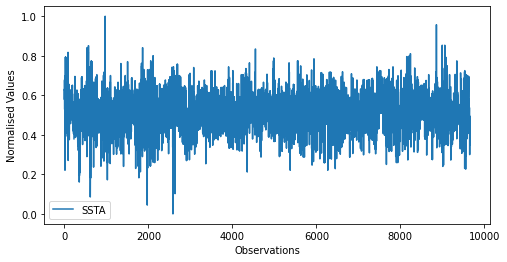

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_scaled['SSTA'].to_numpy(), label='SSTA')
plt.ylabel('Normalised Values')
plt.xlabel('Observations')
plt.legend()
plt.savefig('figure1.png', dpi=100)
plt.show()

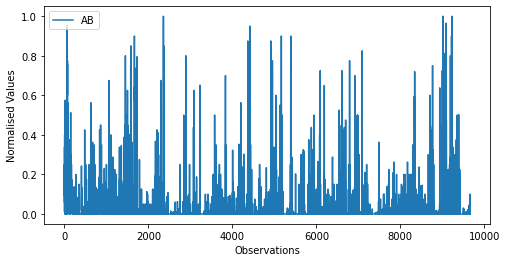

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_scaled['Average_Bleaching'], label='AB')
plt.ylabel('Normalised Values')
plt.xlabel('Observations')
plt.legend()
plt.savefig('figure2.png', dpi=100)
plt.show()

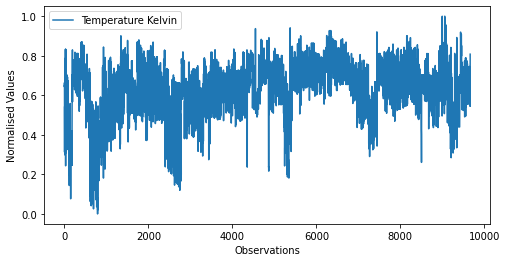

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_scaled['Temperature_Kelvin'], label='Temperature Kelvin')
plt.ylabel('Normalised Values')
plt.xlabel('Observations')
plt.legend()
plt.savefig('figure3.png', dpi=100)
plt.show()

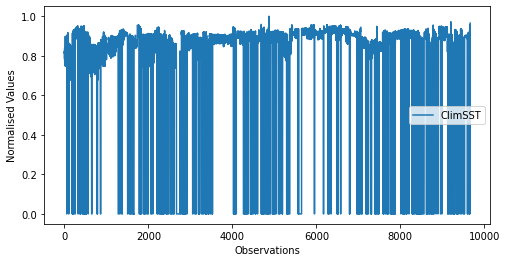

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_scaled['ClimSST'], label='ClimSST')
plt.ylabel('Normalised Values')
plt.xlabel('Observations')
plt.legend()
plt.savefig('figure4.png', dpi=100)
plt.show()

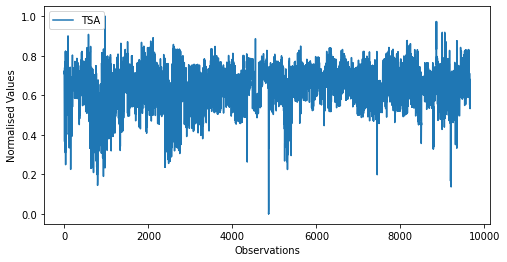

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_scaled['TSA'], label='TSA')
plt.ylabel('Normalised Values')
plt.xlabel('Observations')
plt.legend()
plt.savefig('figure5.png', dpi=100)
plt.show()

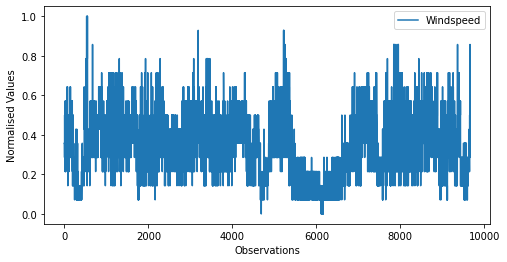

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_scaled['Windspeed'], label='Windspeed')
plt.ylabel('Normalised Values')
plt.xlabel('Observations')
plt.legend()
plt.savefig('figure6.png', dpi=100)
plt.show()

# Plot maps

In [ ]:
# plot values by region (country) when you extract them.
# plot geopandas heatmap of the world and color them with respect to average bleaching.

In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot 

In [ ]:
# df_scaled_cleaned_v2.Longitude_Degrees

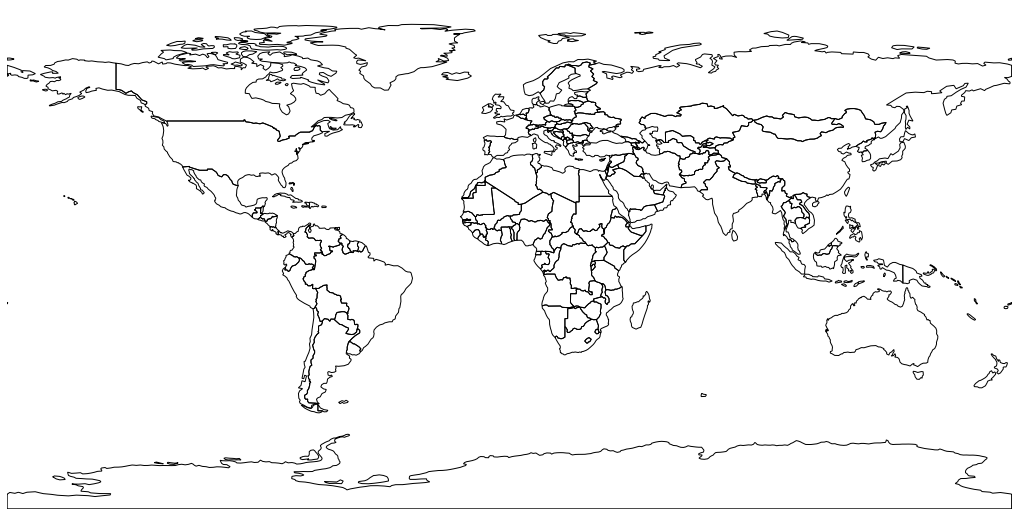

In [ ]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

geoplot.polyplot(world, figsize=(18, 12))
plt.show();

A GeoDataFrame needs a shapely object. We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects and set it as a geometry while creating the GeoDataFrame. (note that points_from_xy() is an enhanced wrapper for [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)])

- Source: https://geopandas.org/gallery/create_geopandas_from_pandas.html

In [ ]:
gdf = geopandas.GeoDataFrame(
    df_scaled_cleaned_v2, geometry=geopandas.points_from_xy(df_scaled_cleaned_v2.Longitude_Degrees, df_scaled_cleaned_v2.Latitude_Degrees))

In [ ]:
gdf.geometry

0       POINT (149.40772 -20.89983)
1       POINT (149.42100 -20.89306)
2       POINT (149.47206 -20.74581)
3       POINT (149.46494 -20.73769)
4       POINT (148.81458 -20.25936)
                   ...             
9660      POINT (48.38642 13.93589)
9661      POINT (48.38642 13.93589)
9662      POINT (50.01525 14.81772)
9663      POINT (42.39181 15.70161)
9664      POINT (42.39181 15.70161)
Name: geometry, Length: 9653, dtype: geometry

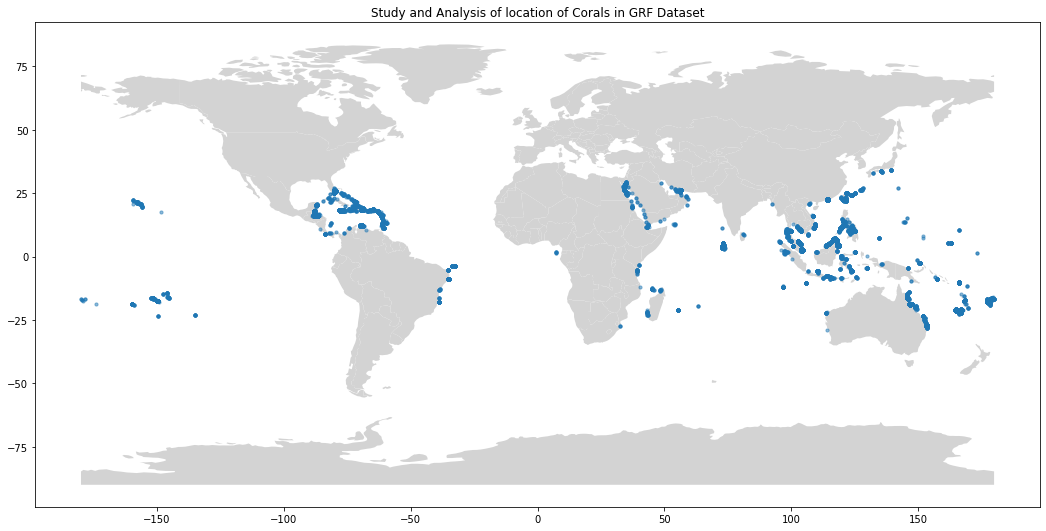

In [ ]:
fig, ax = plt.subplots(figsize = (18,12))
world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, alpha=0.5, legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Study and Analysis of location of Corals in GRF Dataset')
plt.savefig('Location of Corals in GRF', dpi=300)

- Source: https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73

In [ ]:
# Create a new column to plot non zero average bleaching values 
# gdf['Average_Bleaching_for_map'] # To plot only non zero values of average bleaching  
gdf['Average_Bleaching_for_map_non_zero'] = gdf['Average_Bleaching_for_map'][gdf['Average_Bleaching_for_map'] != 0]

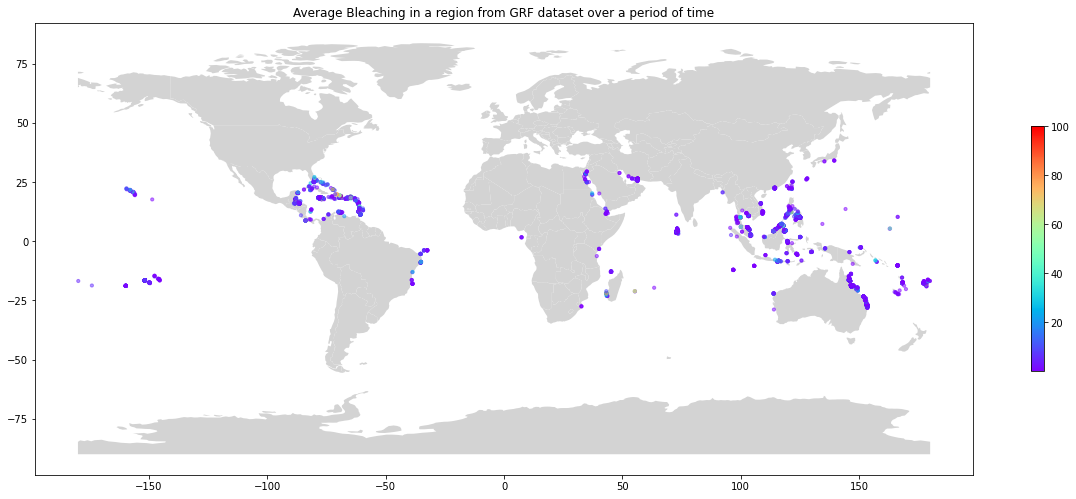

In [ ]:
# Plot average bleaching of all locations with non-zero values over 35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in a region from GRF dataset over a period of time')
plt.savefig('Average Bleaching in a region from GRF dataset over a period of time (AB>0)')

# Problem with the graph, each location/column in calculated and plotted multiple times you need to aggregate the geodataframe and plot again 

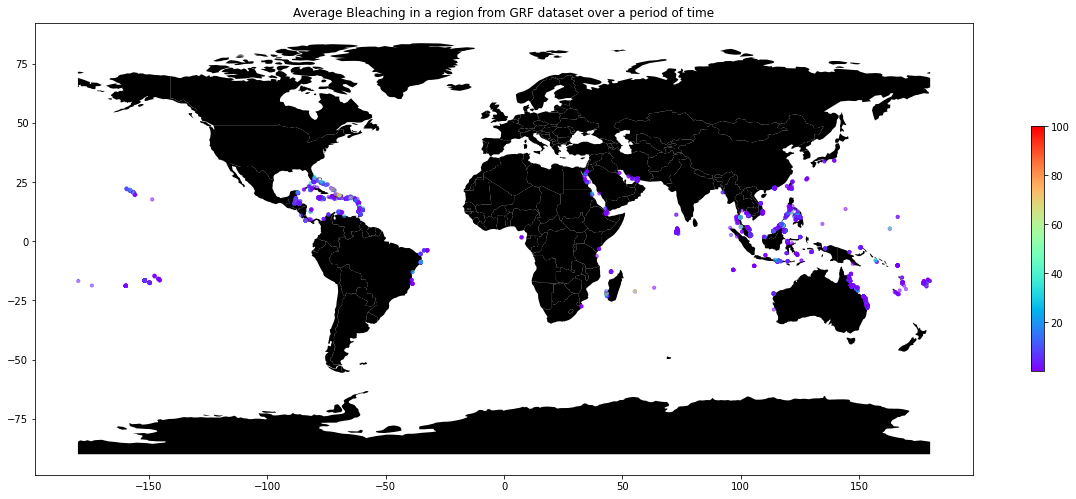

In [ ]:
# Plot average bleaching of all locations with non-zero values over 35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, color='black')
gdf.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in a region from GRF dataset over a period of time')
plt.savefig('Average Bleaching in a region from GRF dataset over a period of time (AB>0)')

# Problem with the graph, each location/column in calculated and plotted multiple times you need to aggregate the geodataframe and plot again 

#  FOllow this https://geopandas.org/gallery/plotting_basemap_background.html here:

In [ ]:
!pip install contextily 

In [ ]:
import contextily as cx

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

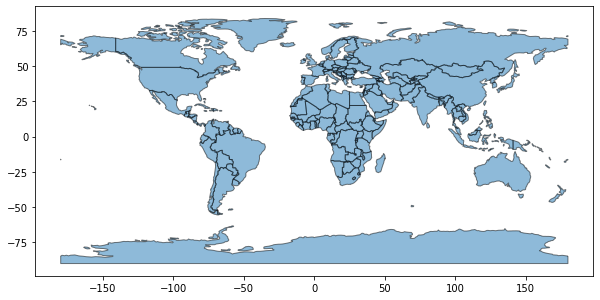

In [ ]:
df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_wm = df.to_crs(epsg=4326)
df.crs

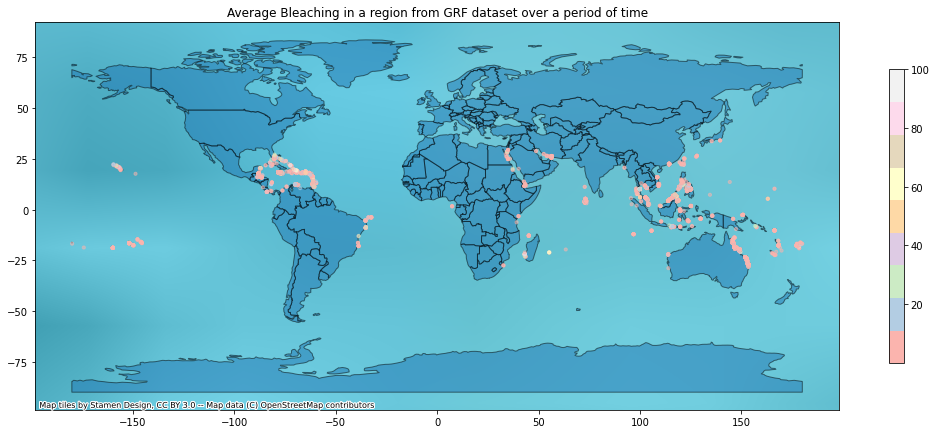

In [ ]:
ax = df_wm.plot(figsize=(18, 18), alpha=0.5, edgecolor='k')
gdf.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'Pastel1',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in a region from GRF dataset over a period of time')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=10)
# cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
# cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
plt.savefig('Average Bleaching in a region from GRF dataset over a period of time (AB>0)')


In [ ]:
# Plot average bleaching of all locations with non-zero values over 35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, color='darkgrey')
gdf.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in a region from GRF dataset over a period of time')
plt.savefig('Average Bleaching in a region from GRF dataset over a period of time (AB>0)')

# Problem with the graph, each location/column in calculated and plotted multiple times you need to aggregate the geodataframe and plot again 

# Chloropeth Maps - WOrld

- Source: https://geopandas.org/docs/user_guide/mapping.html

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


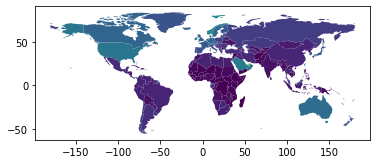

In [ ]:
# Plot by GDP per capita
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap');

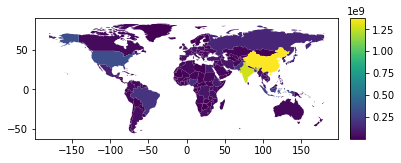

In [ ]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt

# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

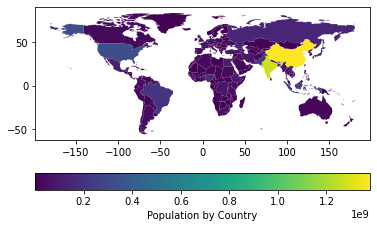

In [ ]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

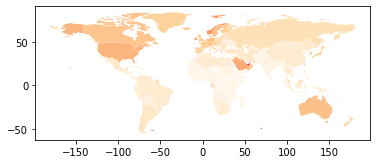

In [ ]:
world.plot(column='gdp_per_cap', cmap='OrRd');

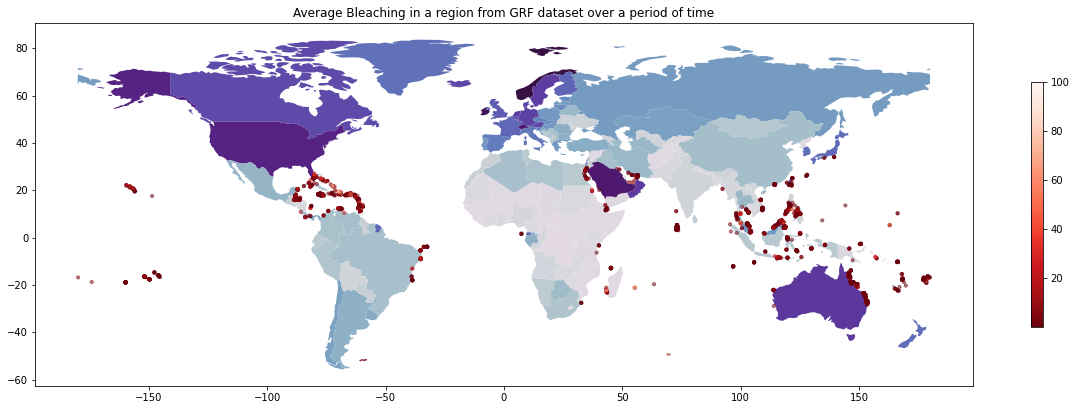

In [ ]:
# Plot average bleaching of all locations with non-zero values over 35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, column='gdp_per_cap', cmap='twilight')
gdf.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'Reds_r',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in a region from GRF dataset over a period of time')
plt.savefig('Average Bleaching in a region from GRF dataset over a period of time (AB>0)')

# Problem with the graph, each location/column in calculated and plotted multiple times you need to aggregate the geodataframe and plot again 

# Getting Country Region - Australia and Fixing Dates 

In [ ]:
gdf.Country_Name.unique()[0]

'Australia                                             '

In [ ]:
gdf.Country_Name.unique()

array(['Australia                                             ',
       'Cook Islands                                          ',
       'Fiji                                                  ',
       'French Polynesia                                      ',
       'Madagascar                                            ',
       'Solomon Islands                                       ',
       'Indonesia                                             ',
       'East Timor                                            ',
       'Malaysia                                              ',
       'Maldives                                              ',
       'Cambodia                                              ',
       'Philippines                                           ',
       'Commonwealth of the Northern Mariana Islands (CNMI)   ',
       'Jamaica                                               ',
       'Haiti                                                 ',
       'Dominican Republi

In [ ]:
gdf_australia = gdf[gdf['Country_Name']=='Australia                                             ']

In [ ]:
gdf_australia.reset_index() # to reset index 

,index,ID,Latitude_Degrees,Longitude_Degrees,Date2,Depth,Average_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Average_Bleaching_for_map,Country_Name,State_Island_Province,City_Town,geometry,Average_Bleaching_for_map_non_zero
0,0,0.000000,-20.899833,149.407722,20160326.0,0.170306,0.0625,0.814214,0.661609,0.419740,0.466161,0.218671,0.387674,0.357143,0.629087,0.311828,0.0,0.560876,0.214556,0.333333,0.386620,0.500000,0.285714,0.102991,0.146399,0.185413,0.166159,0.723363,0.470790,0.494960,0.226629,0.563003,0.120000,0.143699,0.134615,0.05,0.093418,0.089415,0.132819,0.041074,6.25,Australia ...,Queensland,Keswick Island,POINT (149.40772 -20.89983),6.25
1,1,0.000077,-20.893056,149.421000,20160326.0,0.213974,0.0875,0.814214,0.661609,0.419740,0.466161,0.218671,0.387674,0.357143,0.629087,0.311828,0.0,0.560876,0.214556,0.333333,0.386620,0.500000,0.285714,0.102991,0.146399,0.185413,0.166159,0.723363,0.470790,0.494960,0.226629,0.563003,0.120000,0.143699,0.134615,0.05,0.093418,0.089415,0.132819,0.041074,8.75,Australia ...,Queensland,Keswick Island,POINT (149.42100 -20.89306),8.75
2,2,0.001464,-20.745806,149.472056,20160327.0,0.257642,0.1125,0.823126,0.642480,0.438178,0.514231,0.211102,0.353877,0.357143,0.578354,0.293907,0.0,0.630491,0.197119,0.277778,0.399296,0.519231,0.238095,0.069701,0.146866,0.176739,0.150152,0.706675,0.441581,0.536870,0.220963,0.589812,0.040000,0.108327,0.096154,0.05,0.040074,0.080868,0.115330,0.038705,11.25,Australia ...,Queensland,Wigton Island,POINT (149.47206 -20.74581),11.25
3,3,0.001541,-20.737694,149.464944,20160327.0,0.213974,0.2500,0.824040,0.654354,0.441432,0.472486,0.234651,0.343936,0.357143,0.600902,0.290323,0.0,0.616507,0.260804,0.222222,0.371127,0.480769,0.238095,0.094928,0.135173,0.168345,0.141768,0.719512,0.432990,0.502387,0.249292,0.596515,0.080000,0.096536,0.096154,0.05,0.062633,0.063774,0.108083,0.028436,25.00,Australia ...,Queensland,Wigton Island,POINT (149.46494 -20.73769),25.00
4,4,0.003467,-20.259361,148.814583,20170806.0,0.082969,0.0100,0.784506,0.312665,0.452278,0.461101,0.276703,0.379722,0.285714,0.678692,0.333333,0.0,0.552863,0.238817,0.472222,0.430986,0.576923,0.333333,0.099870,0.166511,0.197445,0.193598,0.365854,0.463918,0.475862,0.265345,0.567024,0.160000,0.126750,0.134615,0.05,0.000000,0.096647,0.155034,0.044234,1.00,Australia ...,Queensland,Mount Rooper,POINT (148.81458 -20.25936),1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,1295,0.342296,-10.415417,105.685111,20051012.0,0.432314,0.0050,0.000000,0.540677,0.697397,0.760278,0.332773,0.119947,0.357143,0.520669,0.305854,0.0,0.571591,0.274703,0.328704,0.423474,0.564103,0.238095,0.077893,0.170720,0.233461,0.145198,0.565362,0.239404,0.708134,0.295562,0.822163,0.213333,0.177352,0.182692,0.05,0.000000,0.116700,0.215929,0.048578,0.50,Australia ...,Christmas Island,nd,POINT (105.68511 -10.41542),0.50
849,1296,0.342373,-10.415417,105.685111,20061010.0,0.257642,0.0025,0.000000,0.531662,0.697397,0.760278,0.332773,0.119947,0.571429,0.525554,0.305854,0.0,0.571591,0.274703,0.069444,0.423474,0.564103,0.238095,0.000000,0.170720,0.233461,0.145198,0.556911,0.239404,0.708134,0.295562,0.822163,0.046667,0.177352,0.182692,0.05,0.000000,0.116700,0.215929,0.048578,0.25,Australia ...,Christmas Island,nd,POINT (105.68511 -10.41542),0.25
850,1297,0.342450,-10.415417,105.685111,20061011.0,0.432314,0.0000,0.000000,0.48757

# Converting Date to a proper format

In [ ]:
year = gdf_australia['Date2'][0].astype(str)[:4] # Year
year = int(year)

In [ ]:
month = gdf_australia['Date2'][0].astype(str)[4:6] # Month 
month= int(month)

In [ ]:
day = gdf_australia['Date2'][0].astype(str)[6:8] # Day
day = int(day)

In [ ]:
from datetime import datetime
d1 = datetime(year, month, day)
d1

datetime.datetime(2016, 3, 26, 0, 0)

In [ ]:
len(gdf_australia)

853

In [ ]:
# datetime_list = [] 
# for x in range(853):
#   year = gdf_australia['Date2'][x].astype(str)[:4] # Year
#   month = gdf_australia['Date2'][x].astype(str)[4:6] # Month 
#   day = gdf_australia['Date2'][x].astype(str)[6:8] # Day
#   date = datetime(int(year), int(month), int(day))
#   datetime_list.append(date)

# getting key error due to range issues even after resetting index - fix

# Getting Belize, Mexico, Taiwan 

In [ ]:
# Belize 
gdf_belize = gdf[gdf['Country_Name']=='Belize                                                ']
gdf_belize.reset_index()

# Mexico 
gdf_mexico = gdf[gdf['Country_Name']=='Mexico                                                ']
gdf_mexico.reset_index()

# Taiwan 
gdf_taiwan = gdf[gdf['Country_Name']=='Taiwan                                                ']
gdf_taiwan.reset_index()

,index,ID,Latitude_Degrees,Longitude_Degrees,Date2,Depth,Average_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Average_Bleaching_for_map,Country_Name,State_Island_Province,City_Town,geometry,Average_Bleaching_for_map_non_zero
0,512,0.239368,21.955583,120.711889,20161105.0,0.213974,0.0,0.000000,0.564424,0.600868,0.620493,0.262125,0.238569,0.571429,0.542653,0.315412,0.0,0.353853,0.219864,0.361111,0.330282,0.493590,0.269841,0.077330,0.120985,0.141112,0.154980,0.575738,0.341924,0.580371,0.197356,0.676050,0.133333,0.091132,0.102564,0.00,0.000000,0.058295,0.116591,0.019221,0.0,Taiwan ...,Pingtung County,Hengchun Township,POINT (120.71189 21.95558),NaN
1,513,0.239445,21.955583,120.711889,20161106.0,0.432314,0.0,0.000000,0.564424,0.600868,0.620493,0.262125,0.238569,0.571429,0.542653,0.315412,0.0,0.353853,0.219864,0.361111,0.330282,0.493590,0.269841,0.077330,0.120985,0.141112,0.154980,0.575738,0.341924,0.580371,0.197356,0.676050,0.133333,0.091132,0.102564,0.00,0.000000,0.058295,0.116591,0.019221,0.0,Taiwan ...,Pingtung County,Hengchun Township,POINT (120.71189 21.95558),NaN
2,514,0.239522,21.955583,120.711889,20170422.0,0.235808,0.0,0.000000,0.598725,0.600868,0.620493,0.262125,0.238569,0.571429,0.606915,0.315412,0.0,0.353853,0.219864,0.268519,0.330282,0.493590,0.269841,0.021066,0.120985,0.141112,0.154980,0.609114,0.341924,0.580371,0.197356,0.676050,0.133333,0.091132,0.102564,0.00,0.000000,0.058295,0.116591,0.019221,0.0,Taiwan ...,Pingtung County,Hengchun Township,POINT (120.71189 21.95558),NaN
3,515,0.239599,21.955583,120.711889,20170423.0,0.475983,0.0,0.000000,0.598725,0.600868,0.620493,0.262125,0.238569,0.571429,0.606915,0.315412,0.0,0.353853,0.219864,0.268519,0.330282,0.493590,0.269841,0.021066,0.120985,0.141112,0.154980,0.609114,0.341924,0.580371,0.197356,0.676050,0.133333,0.091132,0.102564,0.00,0.000000,0.058295,0.116591,0.019221,0.0,Taiwan ...,Pingtung County,Hengchun Township,POINT (120.71189 21.95558),NaN
4,516,0.239676,21.955583,120.711889,20171126.0,0.213974,0.0,0.000000,0.507476,0.600868,0.620493,0.262125,0.238569,0.785714,0.539271,0.315412,0.0,0.353853,0.219864,0.287037,0.330282,0.493590,0.269841,0.174166,0.120985,0.141112,0.154980,0.520325,0.341924,0.580371,0.197356,0.676050,0.120000,0.091132,0.102564,0.00,0.049805,0.058295,0.116591,0.019221,0.0,Taiwan ...,Pingtung County,Hengchun Township,POINT (120.71189 21.95558),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,8891,0.939753,25.193056,121.702222,20100704.0,0.262009,0.0,0.890082,0.696570,0.237527,0.302340,0.187553,0.546720,0.428571,0.642616,0.405018,0.0,0.544733,0.421531,0.277778,0.433803,0.500000,0.380952,0.000000,0.275023,0.392930,0.267530,0.772786,0.608247,0.369761,0.214353,0.369973,0.040000,0.101695,0.153846,0.05,0.000000,0.063116,0.118324,0.026856,0.0,Taiwan ...,New Taipei City,Wanli District,POINT (121.70222 25.19306),NaN
176,8892,0.939831,25.211500,121.698833,20140817.0,0.213974,0.0,0.845293,0.599604,0.237527,0.306768,0.187553,0.576541,0.428571,0.429538,0.383513,0.0,0.536936,0.407885,0.111111,0.356338,0.461538,0.333333,0.101430,0.202993,0.315893,0.233232,0.666239,0.634021,0.363395,0.196412,0.344504,0.120000,0.078850,0.076923,0.00,0.061306,0.057857,0.112652,0.022117,0.0,Taiwan ...,New Taipei City,Wanli District,POINT (121.69883 25.21150),NaN
177,8893,0.939908,25.211500,121.698833,20140817.0,0.432314,0.0,0.845293,0.599604,

# Plotting Maps for Australia 

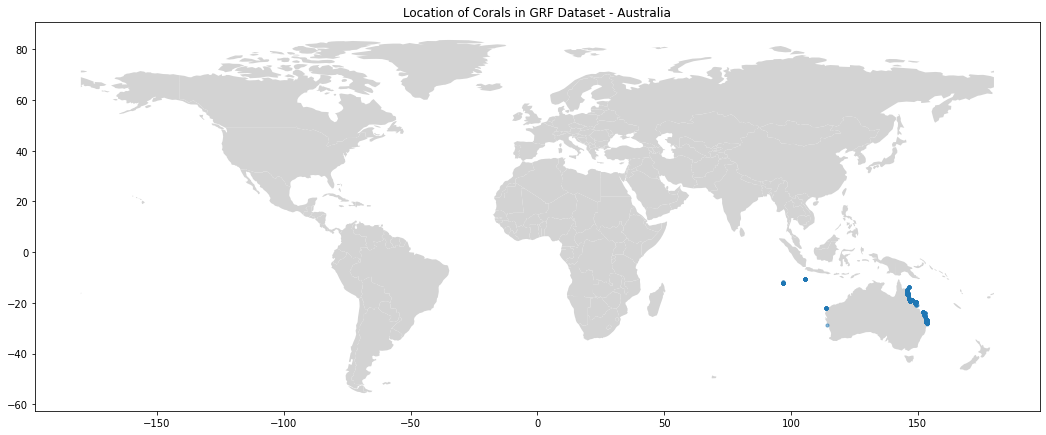

In [ ]:
# Location of Corals in Australia 

# Only Australia
fig, ax = plt.subplots(figsize = (18,12))
# world.to_crs(epsg=4326).plot(ax=ax,color='white', edgecolor='black')  # political map
world.to_crs(epsg=4326).plot(ax=ax,color='lightgrey') 
gdf_australia.plot(ax=ax, alpha=0.5, legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Location of Corals in GRF Dataset - Australia')
plt.savefig('Location of Corals in GRF - Australia', dpi=300)

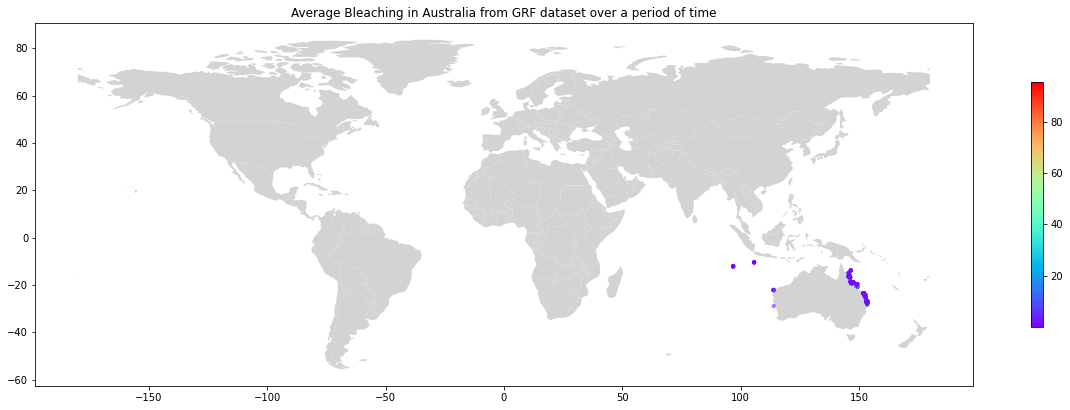

In [ ]:
# Plot average bleaching of Australia with non-zero values over 35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf_australia.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in Australia from GRF dataset over a period of time')
plt.savefig('Average Bleaching in  Australia from GRF dataset over a period of time (AB>0)')


# Plotting Maps for Belize


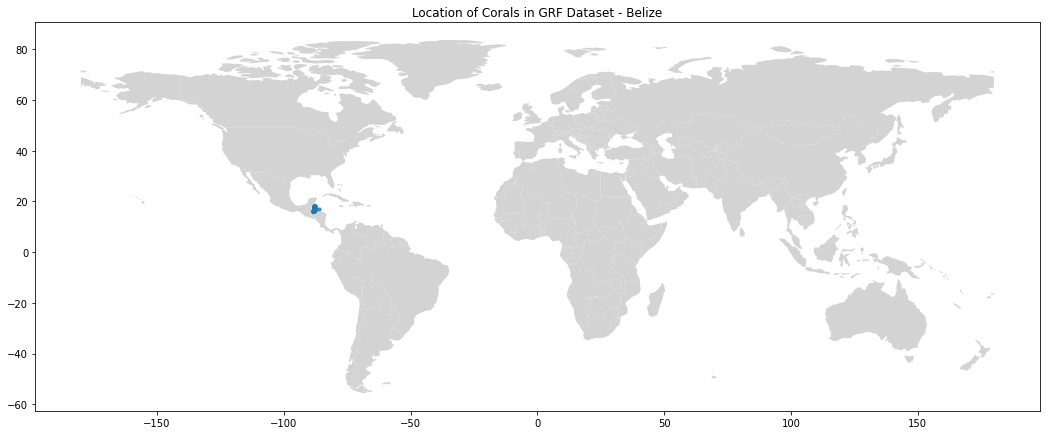

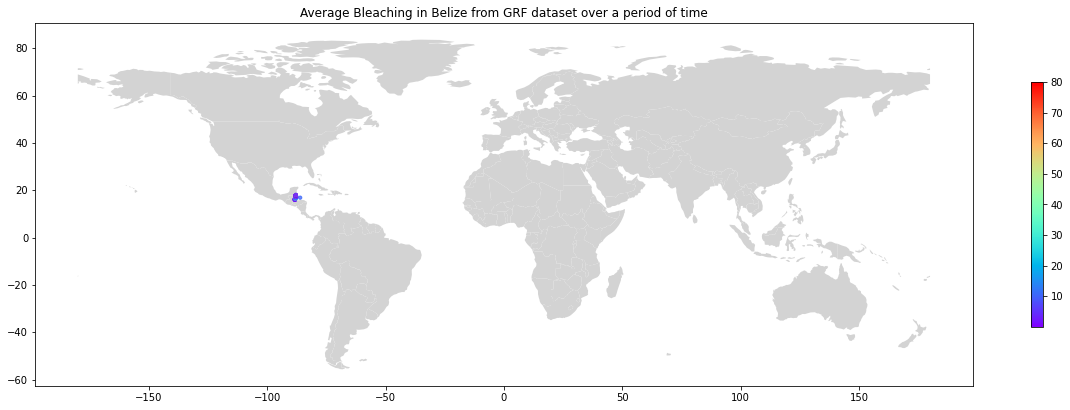

In [ ]:
# Location of Corals in Belize 

fig, ax = plt.subplots(figsize = (18,12))
# world.to_crs(epsg=4326).plot(ax=ax,color='white', edgecolor='black')  # political map
world.to_crs(epsg=4326).plot(ax=ax,color='lightgrey') 
gdf_belize.plot(ax=ax, alpha=0.5, legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Location of Corals in GRF Dataset - Belize')
plt.savefig('Location of Corals in GRF - Belize', dpi=300)

# Plot average bleaching of Belize with non-zero values over ~35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf_belize.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in Belize from GRF dataset over a period of time')
plt.savefig('Average Bleaching in Belize from GRF dataset over a period of time (AB>0)')


# Plotting Maps for Mexico

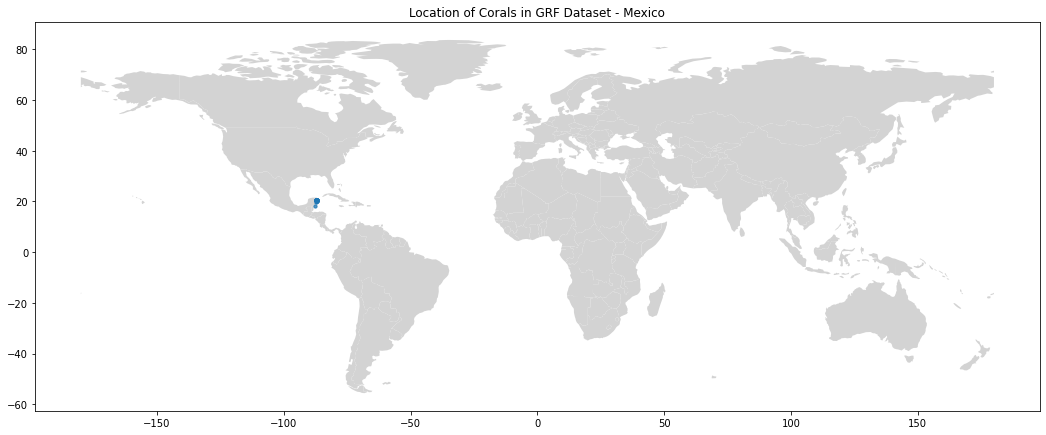

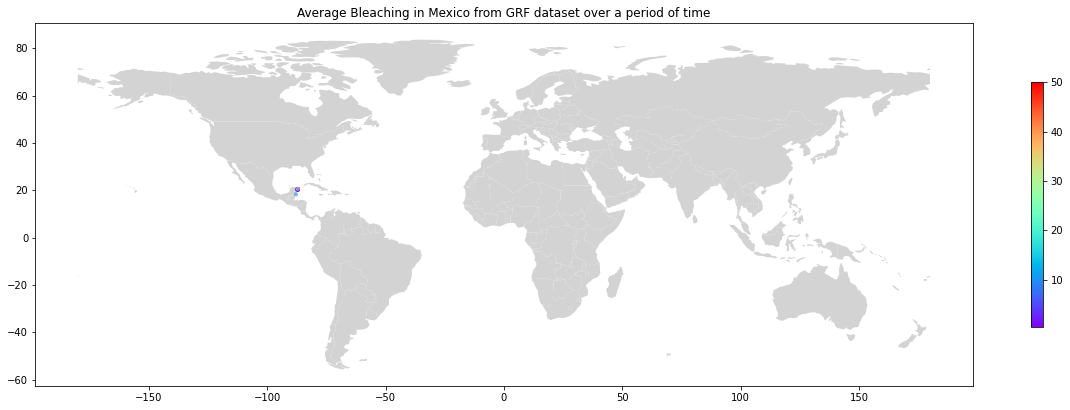

In [ ]:
# Location of Corals in Mexico

fig, ax = plt.subplots(figsize = (18,12))
# world.to_crs(epsg=4326).plot(ax=ax,color='white', edgecolor='black')  # political map
world.to_crs(epsg=4326).plot(ax=ax,color='lightgrey') 
gdf_mexico.plot(ax=ax, alpha=0.5, legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Location of Corals in GRF Dataset - Mexico')
plt.savefig('Location of Corals in GRF - Mexico', dpi=300)

# Plot average bleaching of Mexico with non-zero values over ~35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf_mexico.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in Mexico from GRF dataset over a period of time')
plt.savefig('Average Bleaching in Mexico from GRF dataset over a period of time (AB>0)')


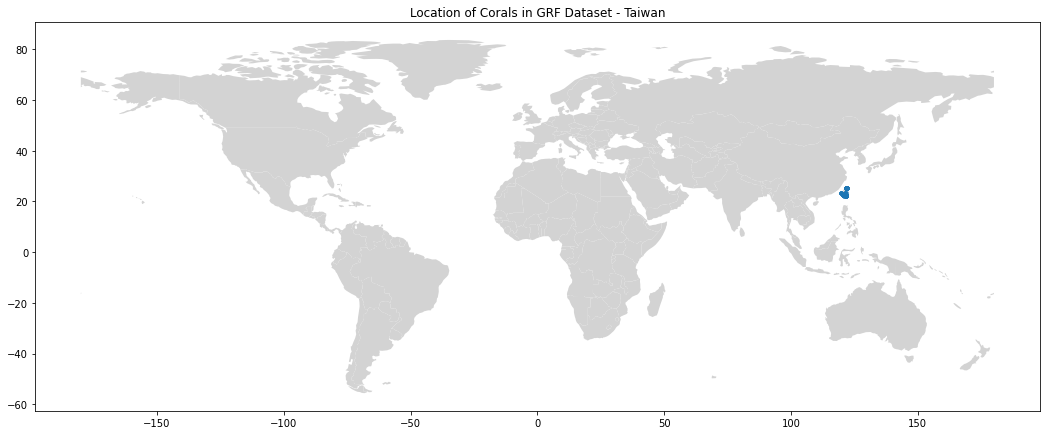

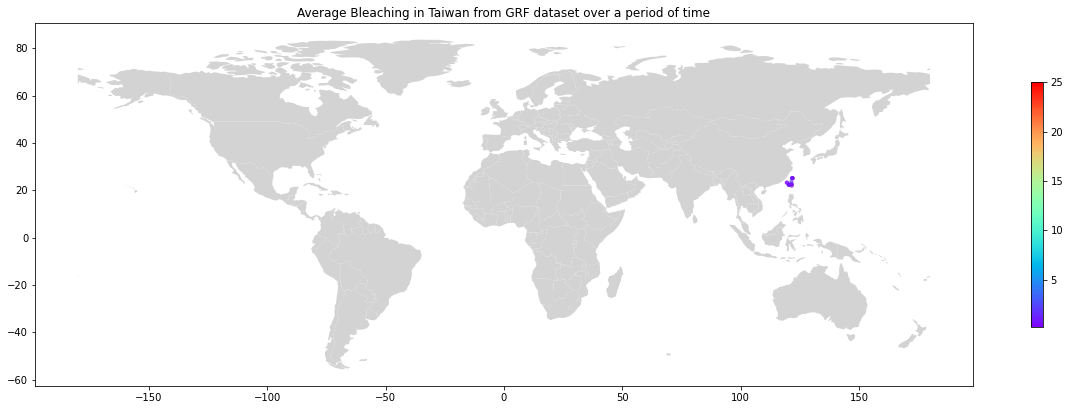

In [ ]:
# Location of Corals in Taiwan

fig, ax = plt.subplots(figsize = (18,12))
# world.to_crs(epsg=4326).plot(ax=ax,color='white', edgecolor='black')  # political map
world.to_crs(epsg=4326).plot(ax=ax,color='lightgrey') 
gdf_taiwan.plot(ax=ax, alpha=0.5, legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Location of Corals in GRF Dataset - Taiwan')
plt.savefig('Location of Corals in GRF - Taiwan', dpi=300)

# Plot average bleaching of Taiwan with non-zero values over ~35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf_taiwan.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Average Bleaching in Taiwan from GRF dataset over a period of time')
plt.savefig('Average Bleaching in Taiwan from GRF dataset over a period of time (AB>0)')


The problem is that the legend does not have a uniform scale of heatmap. Solution: Plot all selected regions in one map :D

No handles with labels found to put in legend.


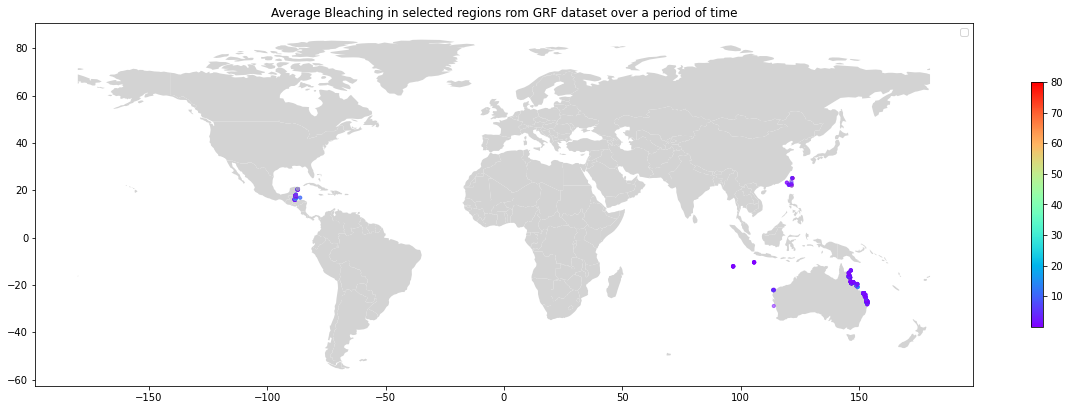

In [ ]:
# Plot average bleaching in selected regions with non-zero values over ~35 years
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf_taiwan.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow', legend_kwds={'shrink': 0.3}, markersize = 10)
gdf_australia.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow', legend_kwds={'shrink': 0.3},  markersize = 10)
gdf_mexico.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow', legend_kwds={'shrink': 0.3}, markersize = 10)
gdf_belize.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'rainbow',legend = True, legend_kwds={'shrink': 0.3}, markersize = 10)
ax.set_title('Average Bleaching in selected regions rom GRF dataset over a period of time')
plt.legend()
plt.savefig('Average Bleaching in selected regions from GRF dataset over a period of time (AB>0)')


# Plotting cities of average bleaching - Australia, Taiwan, Mexico, Belize

In [ ]:
# Group each country by city and plot the average of average bleaching in that city from 1982-2017
gdf_australia_city = gdf_australia.groupby(['City_Town']).mean() 
gdf_australia_city.geometry=geopandas.points_from_xy(gdf_australia_city.Longitude_Degrees, gdf_australia_city.Latitude_Degrees)

In [ ]:
gdf_belize_city = gdf_belize.groupby(['City_Town']).mean() 
gdf_belize_city.geometry=geopandas.points_from_xy(gdf_belize_city.Longitude_Degrees, gdf_belize_city.Latitude_Degrees)

In [ ]:
gdf_mexico_city = gdf_mexico.groupby(['City_Town']).mean() 
gdf_mexico_city.geometry=geopandas.points_from_xy(gdf_mexico_city.Longitude_Degrees, gdf_mexico_city.Latitude_Degrees)

In [ ]:
gdf_taiwan_city = gdf_taiwan.groupby(['City_Town']).mean() 
gdf_taiwan_city.geometry=geopandas.points_from_xy(gdf_taiwan_city.Longitude_Degrees, gdf_taiwan_city.Latitude_Degrees)

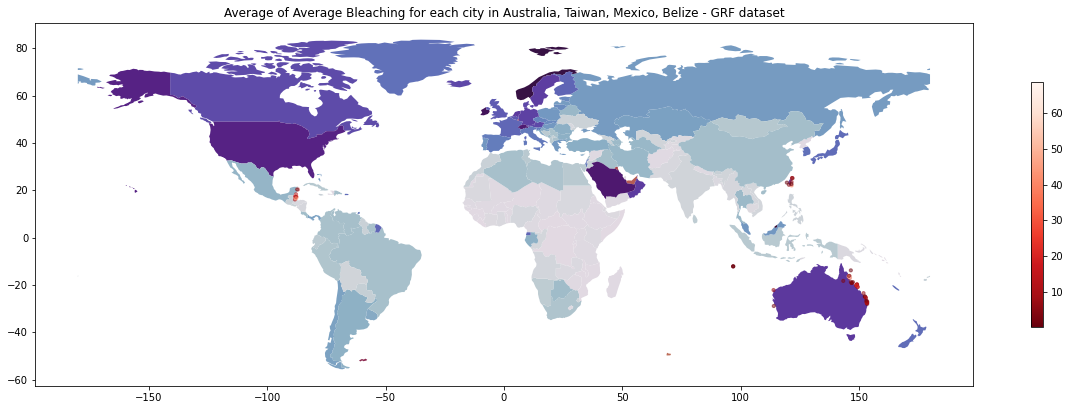

In [ ]:
fig, ax = plt.subplots(figsize = (21,15))
world.to_crs(epsg=4326).plot(ax=ax, column='gdp_per_cap', cmap='twilight')
gdf_australia_city.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'Reds_r', legend = True, legend_kwds={'shrink': 0.3}, markersize = 10)
gdf_mexico_city.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'Reds_r', legend_kwds={'shrink': 0.3}, markersize = 10)
gdf_taiwan_city.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'Reds_r', legend_kwds={'shrink': 0.3}, markersize = 10)
gdf_belize_city.plot(column = 'Average_Bleaching_for_map_non_zero', ax=ax, alpha=0.5, cmap = 'Reds_r', legend_kwds={'shrink': 0.3}, markersize = 10)


ax.set_title('Average of Average Bleaching for each city in Australia, Taiwan, Mexico, Belize - GRF dataset')
plt.savefig('Average of Average Bleaching for each city in Australia, Taiwan, Mexico, Belize GRF dataset')


# Plotting the time series of Australia, Taiwan, Mexico, Belize - Average bleaching 

In [ ]:
datelist = []
dates = gdf_australia['Date2'].to_numpy()
for x in range(len(dates)):
  # print(str(dates[x]))
  # print(str(dates[x])[:4]) # year 
  # print(str(dates[x])[4:6]) # month 
  # print(str(dates[x])[6:8]) # day 
  year = str(dates[x])[:4]
  month = str(dates[x])[4:6]
  day = str(dates[x])[6:8]
  date = datetime(int(year), int(month), int(day))
  datelist.append(date)

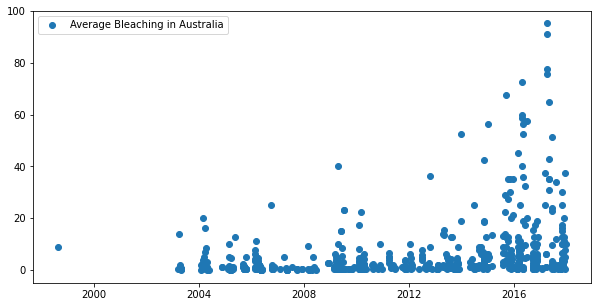

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
# plt.plot(datelist, gdf_australia['Average_Bleaching_for_map_non_zero'])
plt.scatter(datelist, gdf_australia['Average_Bleaching_for_map_non_zero'], label='Average Bleaching in Australia')
plt.ylim(-5, 100)
plt.legend()
plt.show()
plt.savefig("average_bleaching_time_series_australia.png", dpi=100)

In [ ]:
gdf_australia.columns

Index(['ID', 'Latitude_Degrees', 'Longitude_Degrees', 'Date2', 'Depth',
       'Average_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean', 'Average_Bleaching_for_map',
       'Country_Name', 'State_Island_Province', 'City_Town', 'geometry',
       'Average_Bleaching_for_map_non_zero'],
      dtype='object')

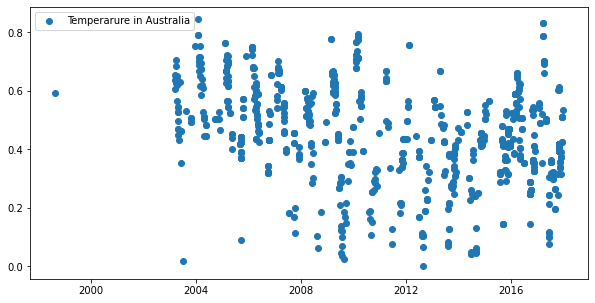

<Figure size 432x288 with 0 Axes>

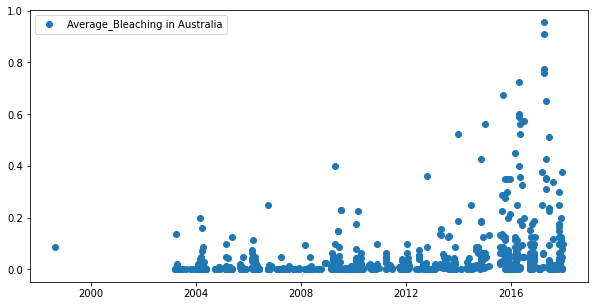

<Figure size 432x288 with 0 Axes>

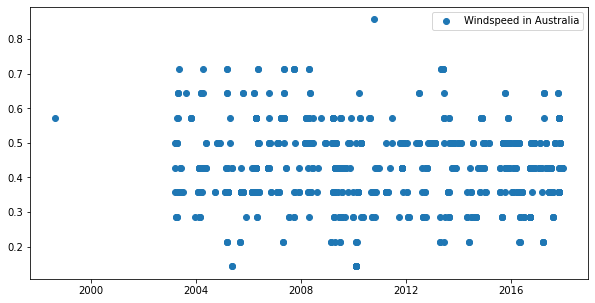

<Figure size 432x288 with 0 Axes>

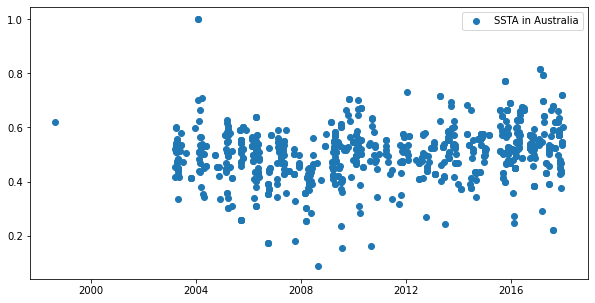

<Figure size 432x288 with 0 Axes>

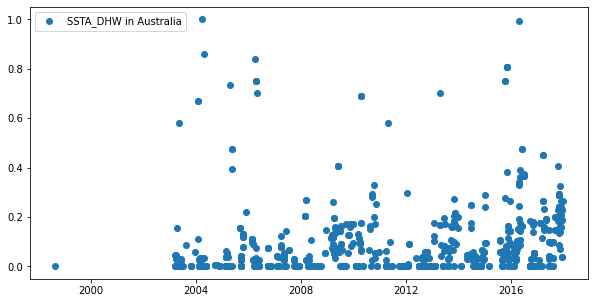

<Figure size 432x288 with 0 Axes>

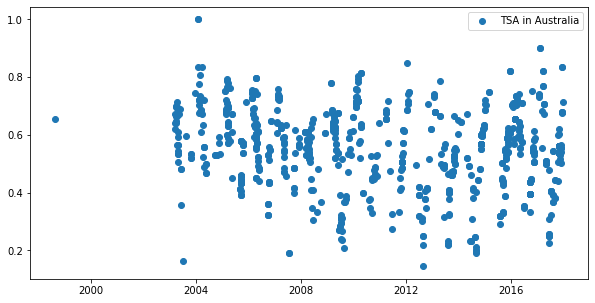

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
# plt.plot(datelist, gdf_australia['Average_Bleaching_for_map_non_zero'])
plt.scatter(datelist, gdf_australia['Temperature_Kelvin'], label='Temperarure in Australia')
plt.legend()
plt.show()
plt.savefig("Temperarure_time_series_australia.png", dpi=100)

plt.figure(figsize=(10,5))
# plt.plot(datelist, gdf_australia['Average_Bleaching_for_map_non_zero'])
plt.scatter(datelist, gdf_australia['Average_Bleaching'], label='Average_Bleaching in Australia')
plt.legend()
plt.show()
plt.savefig("Average_Bleaching_time_series_australia.png", dpi=100)

plt.figure(figsize=(10,5))
# plt.plot(datelist, gdf_australia['Average_Bleaching_for_map_non_zero'])
plt.scatter(datelist, gdf_australia['Windspeed'], label='Windspeed in Australia')
plt.legend()
plt.show()
plt.savefig("Windspeed_time_series_australia.png", dpi=100)



plt.figure(figsize=(10,5))
# plt.plot(datelist, gdf_australia['Average_Bleaching_for_map_non_zero'])
plt.scatter(datelist, gdf_australia['SSTA'], label='SSTA in Australia')
plt.legend()
plt.show()
plt.savefig("SSTA_time_series_australia.png", dpi=100)


plt.figure(figsize=(10,5))
# plt.plot(datelist, gdf_australia['Average_Bleaching_for_map_non_zero'])
plt.scatter(datelist, gdf_australia['SSTA_DHW'], label='SSTA_DHW in Australia')
plt.legend()
plt.show()
plt.savefig("SSTA_DHW_time_series_australia.png", dpi=100)

plt.figure(figsize=(10,5))
# plt.plot(datelist, gdf_australia['Average_Bleaching_for_map_non_zero'])
plt.scatter(datelist, gdf_australia['TSA'], label='TSA in Australia')
plt.legend()
plt.show()
plt.savefig("TSA_time_series_australia.png", dpi=100)

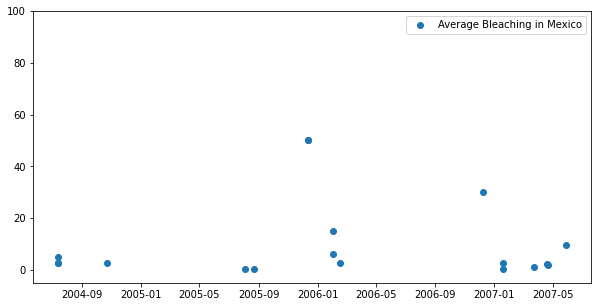

<Figure size 432x288 with 0 Axes>

In [ ]:
datelist = []
dates = gdf_mexico['Date2'].to_numpy()
for x in range(len(dates)):
  year = str(dates[x])[:4]
  month = str(dates[x])[4:6]
  day = str(dates[x])[6:8]
  date = datetime(int(year), int(month), int(day))
  datelist.append(date)

# plot average bleaching over the region 
plt.figure(figsize=(10,5))
plt.scatter(datelist, gdf_mexico['Average_Bleaching_for_map_non_zero'], label='Average Bleaching in Mexico')
plt.ylim(-5, 100)
plt.legend()
plt.show()
plt.savefig("average_bleaching_time_series_mexico.png", dpi=100)

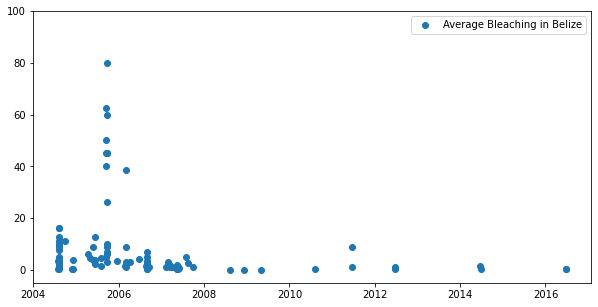

<Figure size 432x288 with 0 Axes>

In [ ]:
datelist = []
dates = gdf_belize['Date2'].to_numpy()
for x in range(len(dates)):
  year = str(dates[x])[:4]
  month = str(dates[x])[4:6]
  day = str(dates[x])[6:8]
  date = datetime(int(year), int(month), int(day))
  datelist.append(date)

# plot average bleaching over the region 
plt.figure(figsize=(10,5))
plt.scatter(datelist, gdf_belize['Average_Bleaching_for_map_non_zero'], label='Average Bleaching in Belize')
plt.ylim(-5, 100)
plt.legend()
plt.show()
plt.savefig("average_bleaching_time_series_belize.png", dpi=100)

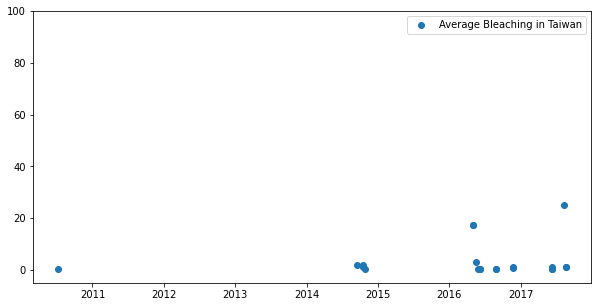

<Figure size 432x288 with 0 Axes>

In [ ]:
datelist = []
dates = gdf_taiwan['Date2'].to_numpy()
for x in range(len(dates)):
  year = str(dates[x])[:4]
  month = str(dates[x])[4:6]
  day = str(dates[x])[6:8]
  date = datetime(int(year), int(month), int(day))
  datelist.append(date)

# plot average bleaching over the region 
plt.figure(figsize=(10,5))
plt.scatter(datelist, gdf_taiwan['Average_Bleaching_for_map_non_zero'], label='Average Bleaching in Taiwan')
plt.ylim(-5, 100)
plt.legend()
plt.show()
plt.savefig("average_bleaching_time_series_taiwan.png", dpi=100)

# Find correlations between variables 

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['Average_Bleaching'])
print('Pearsons correlation between SSTA and AB: %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['Temperature_Kelvin'])
print('Pearsons correlation between SSTA and Temperature: %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['ClimSST'])
print('Pearsons correlation between SSTA and ClimSST: %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['TSA'])
print('Pearsons correlation between SSTA and TSA: %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['Windspeed'])
print('Pearsons correlation between SSTA and Winspeed: %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['Average_Bleaching'], df_scaled_cleaned_v2['Temperature_Kelvin'])
print('Pearsons correlation between AB and Temperature: %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['Average_Bleaching'], df_scaled_cleaned_v2['ClimSST'])
print('Pearsons correlation between AB and ClimSST: %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['Average_Bleaching'], df_scaled_cleaned_v2['TSA'])
print('Pearsons correlation between AB and TSA: %.3f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df_scaled_cleaned_v2['Average_Bleaching'], df_scaled_cleaned_v2['Windspeed'])
print('Pearsons correlation between AB and Winspeed: %.3f' % corr)

Pearsons correlation between SSTA and AB: 0.056
Pearsons correlation between SSTA and Temperature: 0.368
Pearsons correlation between SSTA and ClimSST: -0.035
Pearsons correlation between SSTA and TSA: 0.490
Pearsons correlation between SSTA and Winspeed: -0.117
Pearsons correlation between AB and Temperature: 0.030
Pearsons correlation between AB and ClimSST: 0.030
Pearsons correlation between AB and TSA: 0.035
Pearsons correlation between AB and Winspeed: 0.054


In [ ]:
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['Average_Bleaching'])
print('Spearmans correlation between SSTA and AB: %.3f' % corr)


# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['Temperature_Kelvin'])
print('Spearmans correlation between SSTA and Temperature: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['SSTA'],df_scaled_cleaned_v2['ClimSST'])
print('Spearmans correlation between SSTA and ClimSST: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['TSA'])
print('Spearmans correlation between SSTA and TSA: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['SSTA'], df_scaled_cleaned_v2['Windspeed'])
print('Spearmans correlation between SSTA and Winspeed: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['Average_Bleaching'], df_scaled_cleaned_v2['Temperature_Kelvin'])
print('Spearmans correlation between AB and Temperature: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['Average_Bleaching'], df_scaled_cleaned_v2['ClimSST'])
print('Spearmans correlation between AB and ClimSST: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['Average_Bleaching'], df_scaled_cleaned_v2['TSA'])
print('Spearmans correlation between AB and TSA: %.3f' % corr)

# calculate spearman's correlation
corr, _ = spearmanr(df_scaled_cleaned_v2['Average_Bleaching'], df_scaled_cleaned_v2['Windspeed'])
print('Spearmans correlation between AB and Winspeed: %.3f' % corr)


Spearmans correlation between SSTA and AB: 0.044
Spearmans correlation between SSTA and Temperature: 0.425
Spearmans correlation between SSTA and ClimSST: -0.008
Spearmans correlation between SSTA and TSA: 0.547
Spearmans correlation between SSTA and Winspeed: -0.134
Spearmans correlation between AB and Temperature: 0.015
Spearmans correlation between AB and ClimSST: 0.004
Spearmans correlation between AB and TSA: 0.037
Spearmans correlation between AB and Winspeed: 0.107


# Correlation HeatMap

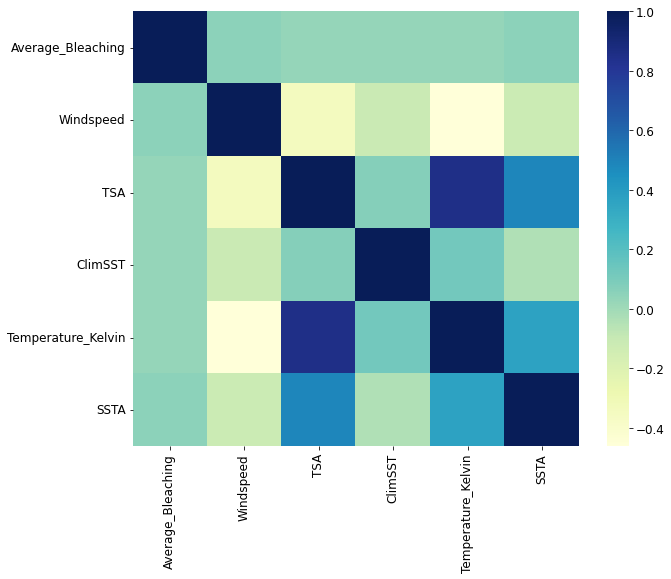

In [ ]:
corrs = df_scaled_cleaned_v2[['Average_Bleaching','Windspeed', 'TSA', 'ClimSST', 'Temperature_Kelvin', 'SSTA']].dropna().corr()

import seaborn as sns
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corrs,cmap="YlGnBu");
plt.savefig("heatmap.png", dpi=100)

# Regression 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_scaled_cleaned_v2.columns

Index(['ID', 'Latitude_Degrees', 'Longitude_Degrees', 'Date2', 'Depth',
       'Average_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean', 'Average_Bleaching_for_map',
       'Country_Name', 'State_Island_Province', 'City_Town', 'geometry',
       'Average_Bleaching_for_map_non_zero'],
      dtype='object')

## Regression to predict AB 

In [ ]:
X = df_scaled_cleaned_v2[['ID', 'Latitude_Degrees', 'Longitude_Degrees', 'Date2', 'Depth', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean']]

y = df_scaled_cleaned_v2[['Average_Bleaching_for_map']] # un-normalised one 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
# print(reg.score(X_train, y_train))
# print(reg.coef_)
# print(reg.intercept_)
# print(reg.predict(X_test))


In [ ]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)


In [ ]:
print(len(X_test), len(y_test))

4827 4827


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[-1.67033394e+00 -2.58118380e-02 -2.54993694e-05 -4.34433727e-06
   9.19673385e-01  8.59978870e-01 -3.38190166e+01  6.41441811e+02
  -6.30022530e+02 -3.18180622e+02 -4.55961525e+02  1.90192917e+00
   1.30137851e+00 -4.02307554e+01  3.67040842e-11 -9.08283901e-01
   3.24300739e+00  6.07075035e+00 -6.57931370e+00 -1.97143741e+00
  -1.38776594e+01  3.52234318e-01  2.34159566e+01 -1.19683781e+01
   5.51266205e+01  3.30073222e+01  4.81145733e+02  7.52935810e+02
   2.88532679e+02 -5.57658879e+02  4.61736803e+00  1.58151605e+01
  -6.92786218e+00 -1.43523515e+01  2.31388868e+01 -3.48462476e+01
   1.38278840e+01  1.70645138e+01]]
Mean squared error: 76.28
Coefficient of determination: 0.08


In [ ]:
print(y_test)

      Average_Bleaching_for_map
8084                      20.00
5429                       0.00
734                       10.00
7837                       1.00
7537                       0.00
...                         ...
6041                       0.00
8585                       1.25
6513                       0.00
6057                       0.00
3236                       0.00

[4827 rows x 1 columns]


In [ ]:
print(y_pred)

[[-0.12636169]
 [ 1.49919662]
 [ 2.77985753]
 ...
 [ 2.35199916]
 [ 1.25863569]
 [ 4.63372033]]


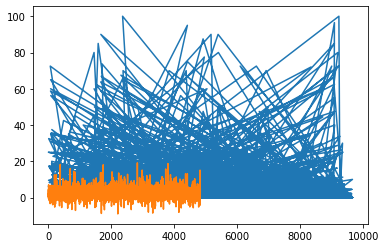

In [ ]:
plt.plot(y_test)
plt.plot(y_pred)

# Regression to predict AB using lesser features

In [ ]:
X = df_scaled_cleaned_v2[['Latitude_Degrees', 'Longitude_Degrees', 'Date2', 'Depth','ClimSST', 'Temperature_Kelvin',
       'Windspeed', 'SSTA','SSTA_DHW', 'TSA']]

y = df_scaled_cleaned_v2[['Average_Bleaching']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[-3.88357028e-04 -8.67274284e-05  2.87638791e-08  2.12242800e-02
   7.81371723e-03  7.91068772e-02  4.41032845e-02  4.81849222e-03
   1.47035656e-01 -7.27158722e-02]]
Mean squared error: 0.01
Coefficient of determination: 0.05


In [ ]:
X = df_scaled_cleaned_v2[['Depth','ClimSST', 'Temperature_Kelvin','Windspeed', 'SSTA','SSTA_DHW', 'TSA']]
y = df_scaled_cleaned_v2[['Average_Bleaching']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[0.0112736  0.00840876 0.04071347 0.05392211]]
Mean squared error: 0.01
Coefficient of determination: 0.01


In [ ]:
X = df_scaled_cleaned_v2[['Depth','ClimSST', 'Temperature_Kelvin','Windspeed']]
y = df_scaled_cleaned_v2[['Average_Bleaching']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[0.0112736  0.00840876 0.04071347 0.05392211]]
Mean squared error: 0.01
Coefficient of determination: 0.01


# Regression in Australia to predict bleaching 

focus on a region 

In [ ]:
# X = gdf_australia[['Latitude_Degrees', 'Longitude_Degrees', 'Date2', 'Depth','ClimSST', 'Temperature_Kelvin',
#        'Windspeed', 'SSTA','SSTA_DHW', 'TSA']]


X = gdf_australia[['ID', 'Latitude_Degrees', 'Longitude_Degrees', 'Date2', 'Depth', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean']]

y = gdf_australia[['Average_Bleaching']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[-1.72339545e-01 -3.38751842e-03  1.09010357e-03  6.38919552e-07
  -6.28729378e-02  1.12061154e-02  9.77196390e+00  5.66605558e+00
  -9.11097342e+00 -7.75750982e+00  3.25982964e-01  2.69953124e-02
  -2.01649792e-03 -7.07931896e-01  4.41234826e-11  5.77516430e-02
   2.17768965e-01 -1.87792570e-02  2.69848095e-01 -2.84281994e-01
   2.35847340e-01  1.76994145e-01 -1.10666037e+00  7.55235926e-01
   3.28985319e-01 -1.00549800e+01  2.81734417e-01  1.13246683e+01
   7.10967980e+00 -4.11894841e+00  4.31498382e-02 -2.58414232e-03
   6.73718266e-01 -3.90241377e-01 -7.01772896e-02 -1.10100030e-01
  -5.62865618e-01  6.38076569e-01]]
Mean squared error: 0.01
Coefficient of determination: 0.28


Better coefficient - better coverage 

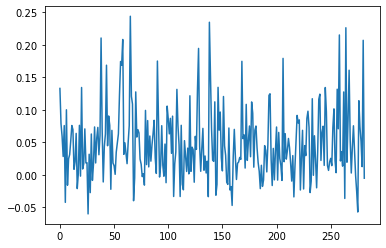

In [ ]:
plt.plot(y_pred)

Length of y test and y pred seems to be unequal...

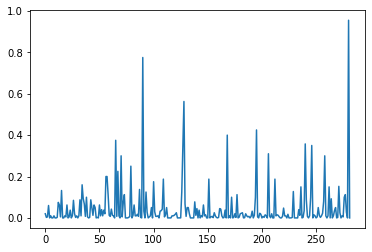

In [ ]:
len(y_test)
plt.plot(y_test.to_numpy())


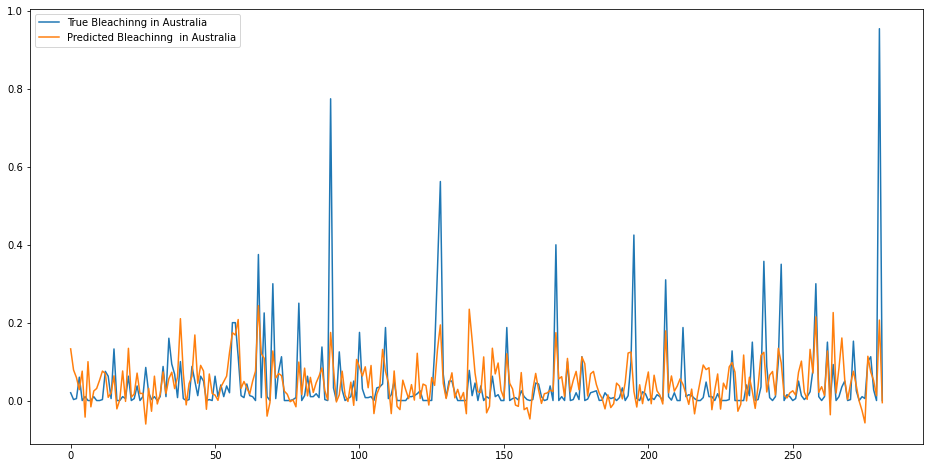

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test.to_numpy(), label ='True Bleachinng in Australia')
plt.plot(y_pred,label ='Predicted Bleachinng  in Australia')
plt.legend()
plt.savefig("figure_lr.png")
plt.show();

#Regression to predict SST 

In [ ]:
X = df_scaled_cleaned_v2[['ID', 'Latitude_Degrees', 'Longitude_Degrees', 'Date2', 'Depth', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean']]

y = df_scaled_cleaned_v2[['SSTA']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
# Make predictions using the testing set
y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 1.22445142e-02 -5.25947753e-04 -2.88197789e-06  2.12524034e-07
   1.16862712e-02 -1.70321057e-02  3.88463570e-01 -2.52289296e+00
   2.35020444e+00  1.22026585e+00  1.12050994e+00  1.28009460e-02
   8.22953292e-02 -1.47095607e+00 -2.63041807e+00 -1.15262049e+00
   1.57439199e+00  7.17241229e-02  3.10188550e-01 -1.55645582e-01
  -5.01926157e-02  7.45894234e-02 -7.14499319e-01  2.03027479e-01
   6.50134209e-01]]
Mean squared error: 0.01
Coefficient of determination: 0.35


# Regression to predict TSA

In [ ]:
X = df_scaled_cleaned_v2[['ID', 'Latitude_Degrees', 'Longitude_Degrees', 'Date2', 'Depth', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean']]
y = df_scaled_cleaned_v2[['TSA']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
# Make predictions using the testing set
y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 2.76776684e-03 -9.62912953e-05  3.44480510e-05 -2.82861074e-08
  -7.89754084e-04 -4.16858069e-04  9.60500155e-01 -4.87592150e-01
  -5.38687841e-02 -3.23955276e-02 -4.67421382e-01 -5.36971483e-03
   1.40285877e-02 -1.21641822e-01 -1.13103971e-15  9.42492988e-03
   4.34200496e-02  1.02095494e-03 -6.10643627e-02 -1.19923860e-02
  -4.55008756e-02 -2.31537638e-03  1.18159797e-01 -4.14149245e-02
   3.08038242e-01]]
Mean squared error: 0.00
Coefficient of determination: 0.99
